# Train HAR Classification Model Experiment

Here we're going to create a few classification models (Logistic Regression, Support Vector Machine (SVM), Random Forest, and a Neural Network) for the Human Aactivity Recognition Using Smartphones dataset.
The first thing we want to do is import the packages we need.

NumPy: For numerical operations.
Pandas: For data manipulation and ingestion.
Matplotlib: For plotting graphs.
Scikit-learn: For machine learning algorithms and data preprocessing.
TensorFlow: This also installs Keras, which is now part of TensorFlow for neural network architectures.

In your chosen terminal enter the following command to install the appropriate libraries

**pip install numpy pandas matplotlib scikit-learn tensorflow**


You can find information about them at their respective documentaiton sites.
- https://numpy.org/doc/stable/user/index.html#user
- https://pandas.pydata.org/docs/user_guide/10min.html
- https://scikit-learn.org/stable/user_guide.html
- https://matplotlib.org/stable/index.html

The first thing we need to do is import the packages we need.
**You can add the import for pandas yourself - import it as 'pd'**

Once that's done continue you can run the cell with the play button or the run all button pictured in the practical document.
Start working your way through the notebook running the cells as you go.

In [ ]:
%pip install --user --upgrade pip
%pip install --user --only-binary=:all: install numpy pandas matplotlib scikit-learn tensorflow

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Load the Dataset
Our chosen dataset was sourced from the Kaggle dataset repository
https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones

The original dataset with more information can be found here:
Reyes-Ortiz, J., Anguita, D., Ghio, A., Oneto, L., & Parra, X. (2013). Human Activity Recognition Using Smartphones [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C54S4K.
https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones


The first thing to do is load the data we're going to work with and have a quick look at a summary of it.
Pandas gives us a function to read CSV files.
In this case the HAR dataset has been split into Training and Testing units already
**You might need update the location of the dataset files to point to the correct place you saved it to!**
If running in Jupyter upload the files into the same folder as the jupyter file 
"./" means "from where we are now"

In [25]:
# Load training and test data
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

print(train_df.shape)
print(test_df.shape)

(7352, 563)
(2947, 563)


## Data Split
Next we need to split the dataset into two parts: inputs and expected outputs.
Usually these are referred to as 'X' and 'Y'.

In our case X_train will be our inputs and Y_train our outputs for training the models
While X_test will be our inputs and Y_test our outputs for testing the models

As mentioned earlier our data has already been split into a 70/30 train-test configuration

In [8]:
# 'Activity' is the column with class labels
Y_train = train_df['Activity'].values
X_train = train_df.drop(columns=['Activity']).values

Y_test = test_df['Activity'].values
X_test = test_df.drop(columns=['Activity']).values

# Preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Important: use the same scaler without refitting

# Convert class labels to binary format for neural network
lb = LabelBinarizer()
Y_train_nn = lb.fit_transform(Y_train)
Y_test_nn = lb.transform(Y_test)

## Model Training
Now we fit the machine learning models we're going to use to our data.

In [9]:
# Initialize models
logistic_model = LogisticRegression(C=1/0.1, solver="liblinear", random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(probability=True, random_state=42)
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(Y_train_nn.shape[1], activation='softmax')  # Output layer nodes equal to number of classes
])
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit models on training data
logistic_model.fit(X_train, Y_train)
random_forest_model.fit(X_train, Y_train)
svm_model.fit(X_train, Y_train)
nn_model.fit(X_train, Y_train_nn, epochs=10, batch_size=10, verbose=1)

Epoch 1/10
736/736 [==============================] - 1s 539us/step - loss: 0.2146 - accuracy: 0.9157
Epoch 2/10
736/736 [==============================] - 0s 551us/step - loss: 0.0885 - accuracy: 0.9637
Epoch 3/10
736/736 [==============================] - 0s 571us/step - loss: 0.0751 - accuracy: 0.9714
Epoch 4/10
736/736 [==============================] - 0s 547us/step - loss: 0.0537 - accuracy: 0.9780
Epoch 5/10
736/736 [==============================] - 0s 546us/step - loss: 0.0519 - accuracy: 0.9805
Epoch 6/10
736/736 [==============================] - 0s 547us/step - loss: 0.0558 - accuracy: 0.9792
Epoch 7/10
736/736 [==============================] - 0s 540us/step - loss: 0.0345 - accuracy: 0.9865
Epoch 8/10
736/736 [==============================] - 0s 535us/step - loss: 0.0344 - accuracy: 0.9869
Epoch 9/10
736/736 [==============================] - 0s 540us/step - loss: 0.0393 - accuracy: 0.9867
Epoch 10/10
736/736 [==============================] - 0s 533us/step - loss: 0.033

## Evaluate the Models
Now what we have a completed our models we need to see how accurate they are.
The simplest way to do this is to just have them predict the output for the test data and see how many they got correct and return that as as percentage value between 0-1.

In [16]:
# Predictions on test data
logistic_predictions = logistic_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
nn_predictions = nn_model.predict(X_test)
nn_predictions = lb.inverse_transform(nn_predictions)  # Convert probabilities to class labels


# Performance Evaluation
print("Logistic Regression Accuracy:", accuracy_score(Y_test, logistic_predictions))
print("Random Forest Accuracy:", accuracy_score(Y_test, random_forest_predictions))
print("SVM Accuracy:", accuracy_score(Y_test, svm_predictions))
print("Neural Network Accuracy:", accuracy_score(Y_test, nn_predictions))

Logistic Regression Accuracy: 0.9643705463182898
Random Forest Accuracy: 0.9267051238547676
SVM Accuracy: 0.9524940617577197
Neural Network Accuracy: 0.9392602646759416


### Further Evaluation
A more thourough evaluation method is to look at the receiver operating characteristic (ROC) curve and area under the ROC curve (AUC).
The ROC curve lets us look at how the models perform under different "thresholds".
The threshold we set lets us look at the potential trade off for the true positive rate and the false positive rate.
Ideally we want the ROC curve to end up as close to the upper left corner (high true posite rate, low false positive rate) as we can get it.
Similarly we want the area under the curve to be as high as possible.
Like accuracy AUC is a percentage in the range 0-1.

In [18]:
# Predictions for probabilities (needed for ROC AUC)
logistic_probs = logistic_model.predict_proba(X_test)
random_forest_probs = random_forest_model.predict_proba(X_test)
svm_probs = svm_model.predict_proba(X_test)
nn_probs = nn_model.predict(X_test)

# Compute ROC AUC for Logistic Regression
logistic_roc_auc = roc_auc_score(Y_test, logistic_probs, multi_class='ovr')
print("Logistic Regression ROC AUC:", logistic_roc_auc)

# Compute ROC AUC for Random Forest
random_forest_roc_auc = roc_auc_score(Y_test, random_forest_probs, multi_class='ovr')
print("Random Forest ROC AUC:", random_forest_roc_auc)

# Compute ROC AUC for SVM
svm_roc_auc = roc_auc_score(Y_test, svm_probs, multi_class='ovr')
print("SVM ROC AUC:", svm_roc_auc)

# Compute ROC AUC for Neural Network
# Since nn_predictions are hard class labels, use nn_probs for AUC calculation
nn_roc_auc = roc_auc_score(Y_test, nn_probs, multi_class='ovr')
print("Neural Network ROC AUC:", nn_roc_auc)


Logistic Regression ROC AUC: 0.9953383627051627
Random Forest ROC AUC: 0.9947822513383056
SVM ROC AUC: 0.9976535559449123
Neural Network ROC AUC: 0.9954762461977221


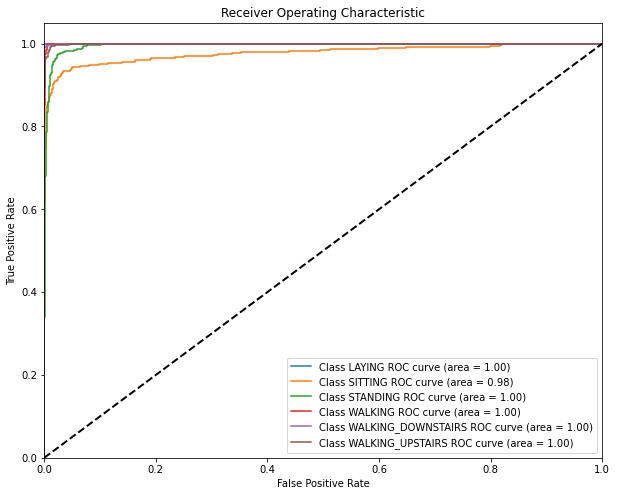

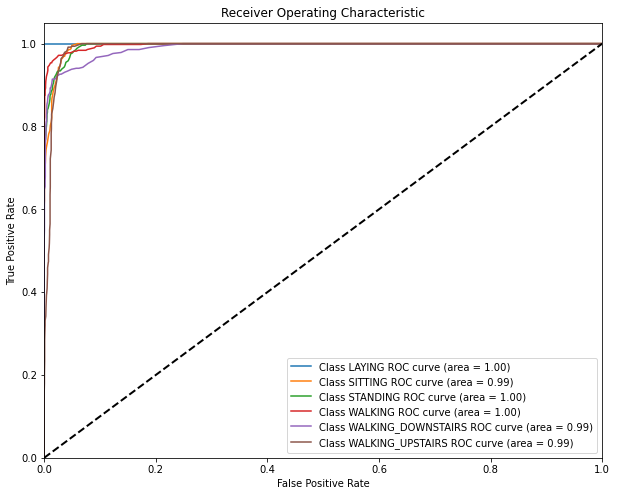

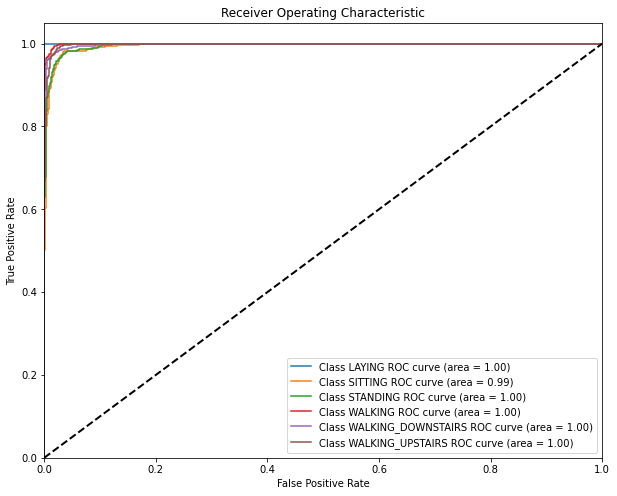

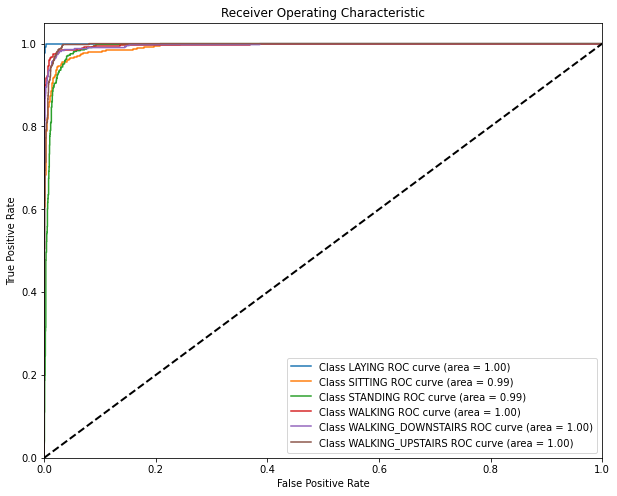

In [19]:
def plot_roc_curve(y_true, y_probs, classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    plt.figure(figsize=(10, 8))

    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_true == classes[i], y_probs[:, i])
        roc_auc[i] = roc_auc_score(y_true == classes[i], y_probs[:, i])
        plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} ROC curve (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Plotting ROC Curves
plot_roc_curve(Y_test, logistic_probs, np.unique(Y_test))
plot_roc_curve(Y_test, random_forest_probs, np.unique(Y_test))
plot_roc_curve(Y_test, svm_probs, np.unique(Y_test))
plot_roc_curve(Y_test, nn_probs, np.unique(Y_test))


## Conclusion

That's our first experiment done with the different performances of our chosen models. Logistic Regression and SVM performed best overall. 